# Construcción de Programa Monte Carlo para Simulación de un sistema Ising 2D

Este manual está elaborado con el fin de proporcionar una guía práctica para la elaboración de un programa Monte Carlo para la simulación de un sistema Ising 2D. El programa está construido en **python3**. Es cierto que la complejidad del programa es mínima, pero la eficiencia de los ciclos en python es mínima. Es por ello que cabe resaltar que es recomendable emplear otro lenguaje, sea **C++** o **Fortran**, para la implementación del paso Monte Carlo y el algoritmo de Metrópolis.

El sistema que se desea simular es un Ising 2D, cuyo Hamiltoniano consiste únicamente en el término de intercambio 

$$\mathcal{H}=-J\sum_{\left\langle i,j\right\rangle }\sigma_{i}\sigma_{j}$$
donde $J$ es la constante de intercambio y $\sigma_{i}$ y $\sigma_{j}$ son los espines de la posición $i$ y $j$, respectivamente.

Para calcular la magnetización se emplea 

$$M=\sum_{i}\sigma_{i}$$
y para el cálculo de la susceptibilidad magnética y el calor específico se sigue
$$\chi	=	\frac{\left(\left\langle M^{2}\right\rangle -\left\langle M\right\rangle ^{2}\right)}{k_{B}T}$$
		
$$C_{v}	=	\frac{\left(\left\langle E^{2}\right\rangle -\left\langle E\right\rangle ^{2}\right)}{k_{B}T^{2}}$$

## Importación de librerías

In [19]:
import numpy
from collections import defaultdict
from matplotlib import pyplot
import itertools
%matplotlib inline

- **numpy** se emplea para computación científica. Esta contiene muchas funciones para cálculos numéricos.
- **defaultdict** es una clase para crear diccionarios donde cada key tendrá un value de un tipo predeterminado.
- **pyplot** se emplea para las gráficas.
- **itertools** es una librería para construcción de iteradores.
- la sentencia **%matplotlib inline** es por si se está haciendo este tutorial en un ipython notebook, las gráficas de matplotlib sean mostradas dentro de celdas.

## Definición de constantes

In [10]:
length = 10
J = 1.0
kB = 1.0

- **length** es la longitud de nuestro sistema. 
- **J** es la constante de intercambio.
- **kB** es la constante de Boltzmann.

## Creación de arreglos

In [6]:
sites = list()
spins = dict()
nbhs = defaultdict(list)

- **sites** es el arreglo donde se almacenarán las parejas $(i, j)$ de los elementos de la red.
- **spins** es un diccionario donde las keys son las parejas $(i, j)$ y los values son el respectivo valor para el espín.
- **nbhs** es un ```defaultdict(list)```, es decir, los *values* por defecto serán listas vacías. En este diccionario las *keys* son las parejas $(i, j)$ y los *values* son una lista de tuplas, donde cada pareja corresponde a un vecino.

## Creación de la muestra

In [7]:
for x, y in itertools.product(range(length), range(length)):
    sites.append((x,y))

Debemos crear la red cuadrada de lado **length** y agregar a la lista **sites** las parejas $(i, j)$ como tuplas. Se puede observar que **sites** es una lista donde cada elemento es una tupla que corresponde a un sitio:

In [8]:
print(sites)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


## Creación de estado aleatorio

In [23]:
def random_configuration():
    for spin in sites:
        spins[spin] = numpy.random.choice([-1, 1])

La función **random_configuration** recorre todos los sitios y les asigna un valor de 1 o -1 aleatoriamente. Se empleará para darle el estado inicial al sistema a temperatura alta.

Si se ejecuta la función **random_configuration**, el diccionario **spins** tomará valores de -1 o 1 para cada *key*:

In [25]:
random_configuration()
print(spins)

{(7, 3): -1, (6, 9): -1, (1, 3): 1, (4, 8): -1, (3, 0): 1, (2, 8): 1, (9, 8): -1, (8, 0): -1, (0, 7): -1, (6, 2): -1, (1, 6): -1, (3, 7): 1, (2, 5): -1, (8, 5): 1, (5, 8): 1, (4, 0): 1, (9, 0): -1, (6, 7): 1, (5, 5): 1, (7, 6): -1, (5, 0): -1, (0, 4): 1, (3, 5): 1, (1, 1): 1, (3, 2): 1, (2, 6): 1, (8, 2): -1, (4, 5): 1, (9, 3): -1, (6, 0): -1, (1, 4): 1, (7, 5): -1, (2, 3): 1, (1, 9): -1, (8, 7): 1, (4, 2): 1, (9, 6): -1, (6, 5): 1, (5, 3): -1, (0, 1): -1, (7, 0): 1, (6, 8): -1, (3, 1): -1, (9, 9): -1, (0, 6): -1, (1, 7): -1, (0, 9): -1, (7, 8): 1, (2, 4): -1, (8, 4): 1, (5, 9): -1, (4, 7): 1, (9, 1): -1, (6, 6): 1, (5, 6): 1, (7, 7): 1, (2, 1): -1, (8, 9): -1, (9, 4): 1, (5, 1): -1, (0, 3): 1, (7, 2): -1, (1, 2): -1, (3, 8): -1, (4, 9): 1, (3, 3): -1, (2, 9): 1, (8, 1): 1, (4, 4): -1, (6, 3): 1, (1, 5): 1, (8, 8): -1, (3, 6): 1, (2, 2): -1, (8, 6): 1, (4, 1): 1, (9, 7): -1, (6, 4): 1, (5, 4): 1, (0, 0): -1, (7, 1): 1, (0, 5): -1, (1, 0): -1, (0, 8): -1, (7, 9): -1, (2, 7): 1, (8, 3): 

## Función para visualización de los espines

In [28]:
def plot_spins():
    pyplot.figure()
    colors = {1: "red", -1: "blue"}
    for site, spin in spins.items():
        x, y = site
        pyplot.quiver(x, y, 0, spin, pivot="middle", color=colors[spin])
    pyplot.xticks(range(-1,length+1))
    pyplot.yticks(range(-1,length+1))
    pyplot.gca().set_aspect("equal")
    pyplot.grid()
    pyplot.show

La función consiste en recorrer cada pareja $(i, j)$ y en cada punto colocar una flecha de color rojo si el sitio tiene valor 1 o azul si tiene valor -1. Se ejecuta la función **plot_spins** para visualizar el estado del sistema:

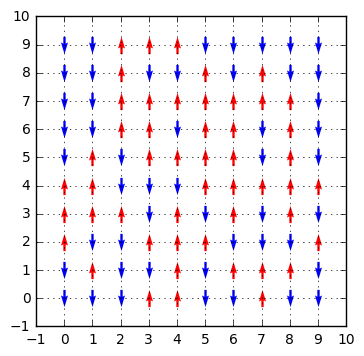

In [29]:
plot_spins()

## Asignación de vecinos

In [38]:
nbhs = defaultdict(list)
for site in spins:
    x, y = site
    if x + 1 < length:
        nbhs[site].append(((x + 1) % length, y))
    if x - 1 >= 0:
        nbhs[site].append(((x - 1) % length, y))
    if y + 1 < length:
        nbhs[site].append((x, (y + 1) % length))
    if y - 1 >= 0:
        nbhs[site].append((x, (y - 1) % length))

Recorremos todos los sitios y agregamos en su lista de *nbhs* los sitios vecinos. Recordemos que el sistema tiene condiciones periódicas de frontera.

## Creación de funciones para cálculo de energía local, energía total y magnetización

In [40]:
def energy_site(site):
    energy = 0.0
    for nbh in nbhs[site]:
        energy += spins[site] * spins[nbh]
    return -J * energy

def total_energy():
    energy = 0.0
    for site in sites:
        energy += energy_site(site)
    return 0.5 * energy

def magnetization():
    mag = 0.0
    for spin in spins.values():
        mag += spin
    return mag

- La función **energy_site** calcula la energía local del sitio $(i, j)$. Debe recibir como argumento una tupla que corresponderá al sitio $(i, j)$. Recordemos que el Hamiltoniano sólo tiene el término de intercambio.
- La función **total_energy** calcula la energía total del sistema sumando las energías locales de cada sitio. Al final se debe dividir por 2 debido a que las interacciones se cuentan 2 veces.
- La función **magnetization** computa la magnetización total de la red sumando los valores del espín de cada sitio.

Si se imprime la magnetización del sistema, debe ser consecuente con la suma de los espines en la figura:

magnetization =  0.0


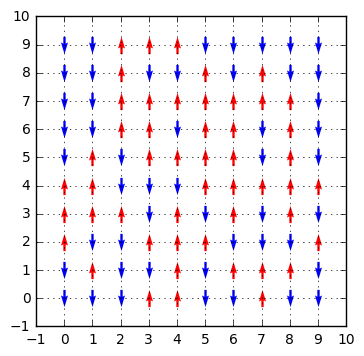

In [42]:
plot_spins()
print("magnetization = ", magnetization())

## Implementación del algoritmo de Metrópolis

In [43]:
def metropolis(site, T):
    oldSpin = spins[site]
    oldEnergy = energy_site(site)
    spins[site] *= -1
    newEnergy = energy_site(site)
    deltaE = newEnergy - oldEnergy
    if deltaE <= 0:
        pass
    else:
        if numpy.random.uniform(0, 1) <= numpy.exp(-deltaE/(kB*T)):
            pass
        else:
            spins[site] *= -1

Para mayor información, se puede consultar el algoritmo de Metrópolis en http://hua-zhou.github.io/teaching/st758-2014fall/top10/metropolis.pdf

## Implementación del paso Monte Carlo

In [45]:
def monte_carlo_step(T):
    for i in range(len(sites)):
        int_rand_site = numpy.random.randint(0, len(sites))
        rand_site = sites[int_rand_site]
        metropolis(rand_site, T)

Un paso Monte Carlo consiste en recorrer la cantidad de sitios que tenga la red aleatoriamente y en cada elección aplicar el algoritmo de Metrópolis.

# Simulación

## Definición de parámetros

In [46]:
amount_mcs = 10000
T_high = 5.0
T_low = 0.01
step = -0.1

Se definen los parámetros de la simulación. Entre ellos está la cantidad de pasos Monte Carlo **amount_mcs**, la temperatura inicial **T_high** y la temperatura final **T_low**. Recordemos que $T_{high} \geq T_{low}$. A su vez, se define el paso entre temperaturas **step**.

## Ciclo de temperatura

In [49]:
%%time
temps = numpy.arange(T_high, T_low, step)
energies = numpy.zeros(shape=(len(temps), amount_mcs))
magnetizations = numpy.zeros(shape=(len(temps), amount_mcs))
random_configuration()
for ind_T, T in enumerate(temps):
    for i in range(amount_mcs):
        monte_carlo_step(T)
        energies[ind_T, i] = total_energy()
        magnetizations[ind_T, i] = magnetization()

CPU times: user 20min 45s, sys: 84 ms, total: 20min 45s
Wall time: 20min 45s


Se crea el arreglo de temperaturas con los valores establecidos anteriormente. Se aloja espacio para almacenar la energía del sistema y la magnetización. Se recorre las temperaturas y los pasos Monte Carlo. En cada paso de temperatura y en cada paso Monte Carlo se almacena la energía total y la magnetización del sistema. Los arreglos **energies** y **magnetizations** se emplearán para calcular los promedios estadísticos.

Una simulación con 10000 pasos Monte Carlo, desde $T_{high}=5.0$ hasta $T_{low}=0.01$ con una paso de $\Delta T = -0.1$ en un computador con Intel® Core™ i7-3612QM CPU @ 2.10GHz tardó 20min 45s.

Podrías observar el estado final de la muestra a $T=0.01$:

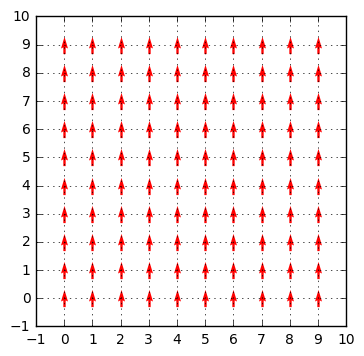

In [55]:
plot_spins_spinst_spins()

# Graficación

## Cálculo de promedios

In [60]:
tau = amount_mcs // 2
energy_mean = numpy.mean(energies[:, tau:], axis=1)
magnetization_mean = abs(numpy.mean(magnetizations[:, tau:], axis=1))

Se dejará la mitad de pasos Monte Carlo para relajación. La otra mitad se ha de promediar.

## Gráficas para la energía total y la magnetización en función de la temperatura

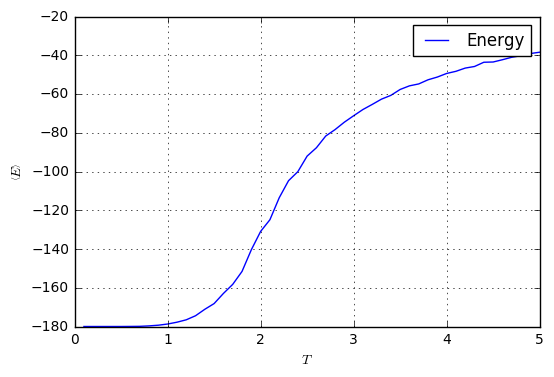

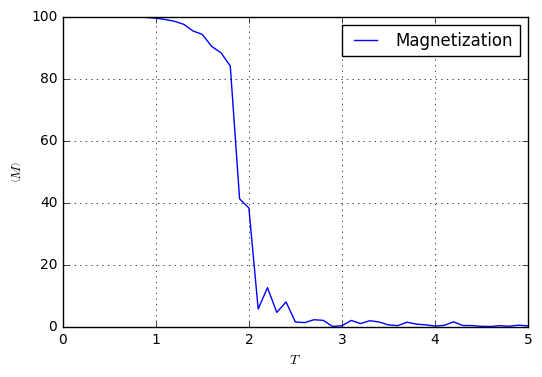

In [61]:
pyplot.figure()
pyplot.plot(temps, energy_mean, label="Energy")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$\left<E\right>$")
pyplot.grid()
pyplot.show()

pyplot.figure()
pyplot.plot(temps, magnetization_mean, label="Magnetization")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$\left<M\right>$")
pyplot.grid()
pyplot.show()

## Cálculo de la susceptibilidad magnética

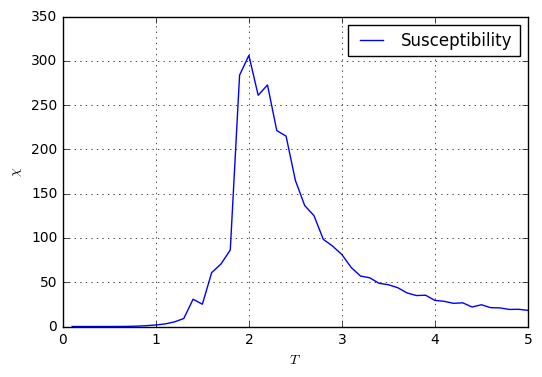

In [62]:
magnetization_std = numpy.std(numpy.abs(magnetizations[:, tau:]), axis=1)
susceptibility = magnetization_std ** 2 / (kB * temps)

pyplot.figure()
pyplot.plot(temps, susceptibility, label="Susceptibility")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$\chi$")
pyplot.grid()
pyplot.show()

## Cálculo del calor específico

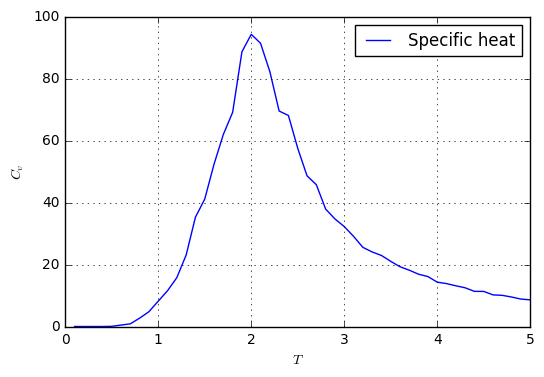

In [63]:
energy_std = numpy.std(energies[:, tau:], axis=1)
specific_heat = energy_std ** 2 / (kB * temps * temps)

pyplot.figure()
pyplot.plot(temps, specific_heat, label="Specific heat")
pyplot.legend()
pyplot.xlabel(r"$T$")
pyplot.ylabel(r"$C_v$")
pyplot.grid()
pyplot.show()

Te invitamos a continuar con tu aprendizaje desde este punto. Podrías intentar obtener curvas de relajación o graficar otro tipo de cantidades como cumulantes de Binder.